In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

Learning rate sweep

- Compare loss of different models after 10 epochs
- Batch size: 4, 8, 16, 32, 64
- Original Switchboard corpus 
- StereoTransformerModel

In [2]:
df = pd.read_csv("../../turn_taking/results/results - lr_sweep.csv")
df = df[df['Step']<10]
df.head()

,Unnamed: 0,Unnamed: 1,Wall time,Step,Value,lr,batch_size,loss
0,NaN,0,1721078498,1,0.077885,0.000001,8,2.492309
1,NaN,1,1721083105,2,0.074535,0.000001,8,2.385134
2,NaN,2,1721086219,3,0.073103,0.000001,8,2.339283
3,NaN,3,1721088575,4,0.072142,0.000001,8,2.308533
4,NaN,4,1721090930,5,0.071382,0.000001,8,2.284240


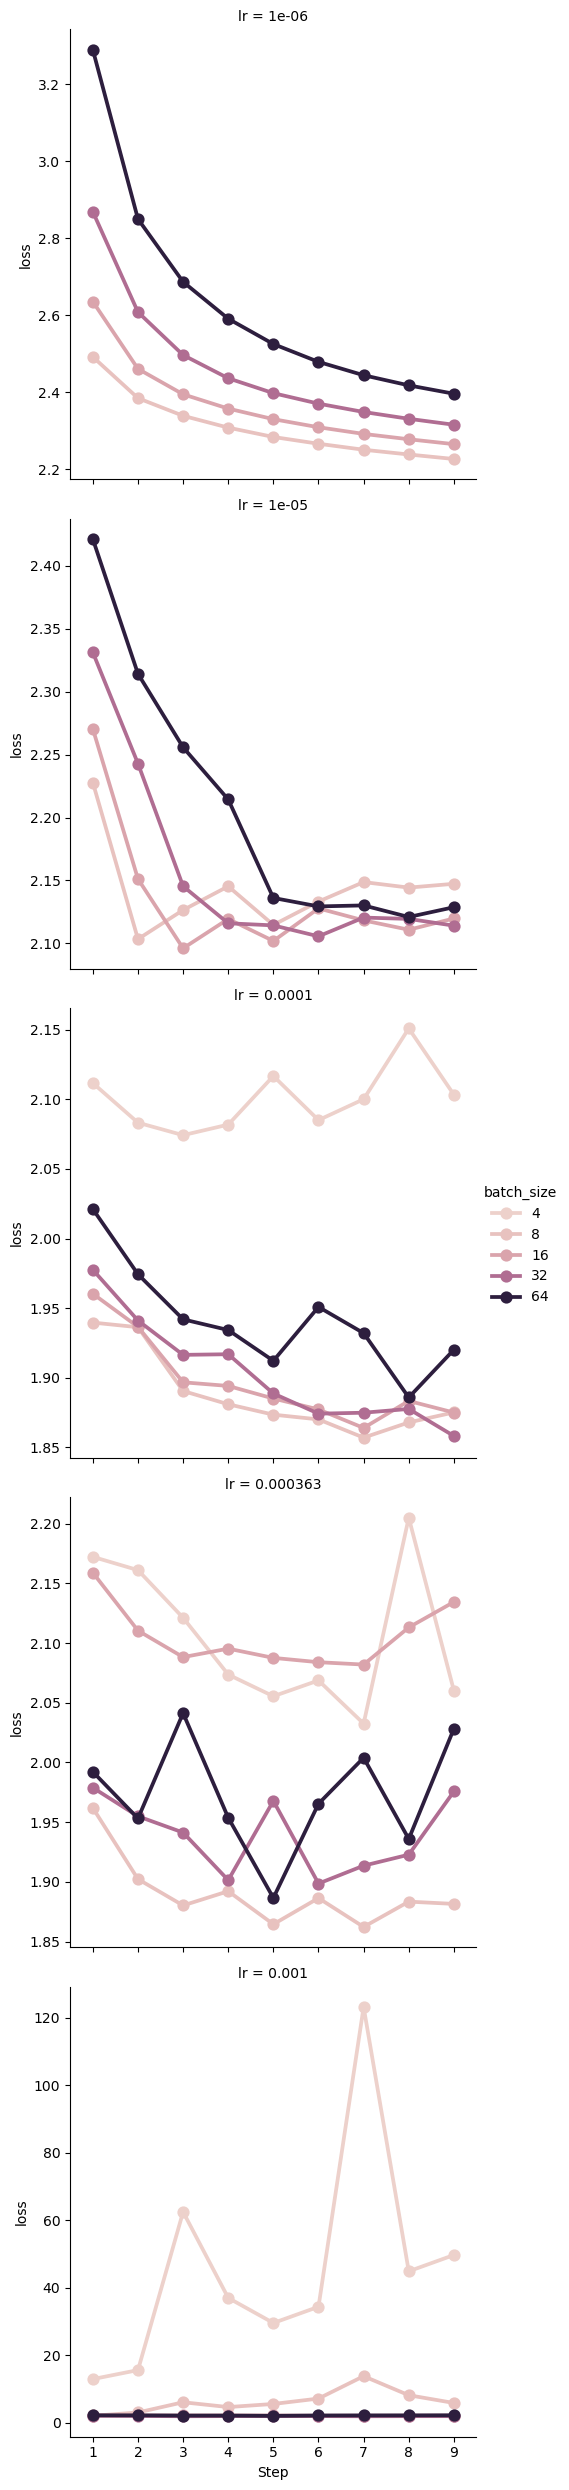

In [3]:
sns.catplot(df, x='Step', y='loss', hue='batch_size', row='lr', kind='point', sharey=False, errorbar=None)

### Runs
- running switchboard gt, switchboard asr and candor
- for 10 epochs
- batch size=32, lr=0.001
- crosstalk has not been removed

In [18]:
df = pd.read_csv("../../turn_taking/results/results - runs.csv")
df.head()

df_train = df[df.split=='train']
df_val = df[df.split=='val']

df_train['loss'] = df_train.groupby(['run', 'fold', 'Step'])['Value'].transform('sum')
df_val['loss'] = df_val.groupby(['run', 'fold', 'Step'])['Value'].transform('sum')

df_train['loss'] = df_train['loss']*df_train['batch_size']
df_val['loss'] = df_val['loss']*df_val['batch_size']

/tmp/ipykernel_1467688/2851560133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['loss'] = df_train.groupby(['run', 'fold', 'Step'])['Value'].transform('sum')
/tmp/ipykernel_1467688/2851560133.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['loss'] = df_val.groupby(['run', 'fold', 'Step'])['Value'].transform('sum')
/tmp/ipykernel_1467688/2851560133.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [21]:
runs = set(df.run)
runs

{'CND',
 'CND_multimodal_audio_only',
 'CND_multimodal_late_fusion',
 'SWB_ASR',
 'SWB_GT'}

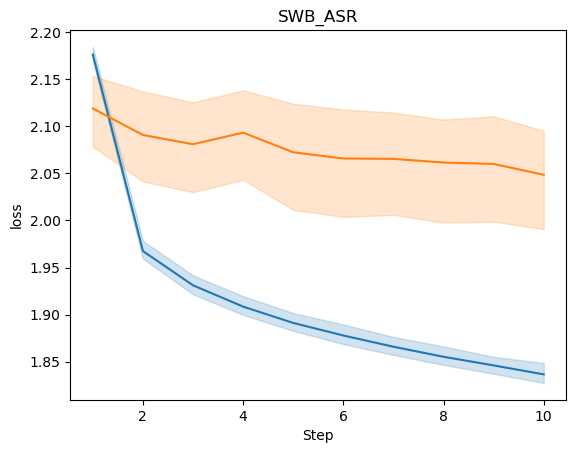

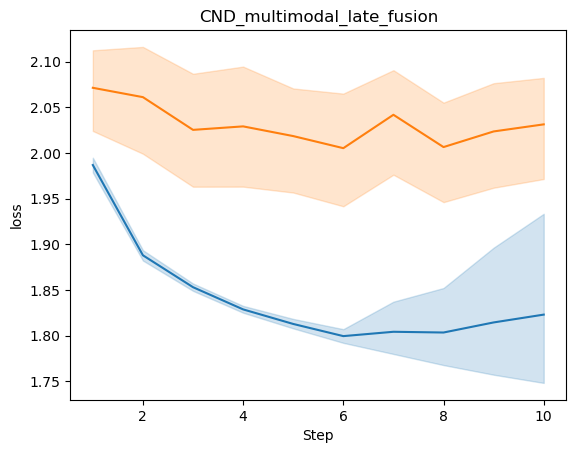

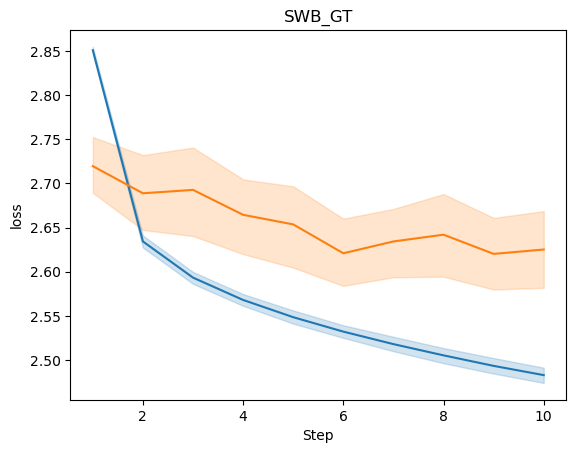

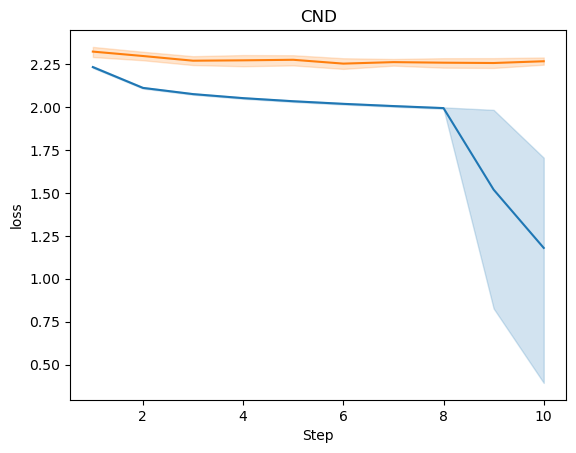

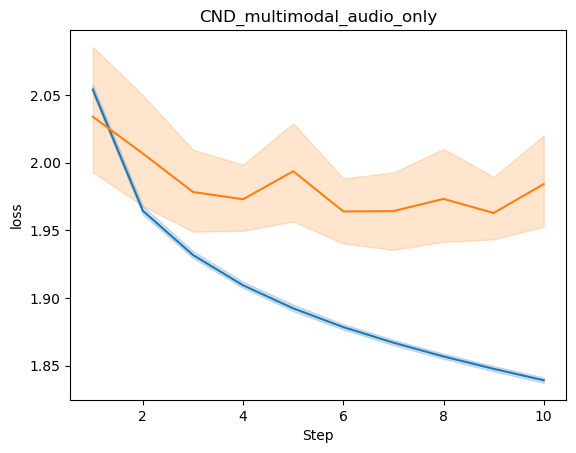

In [22]:
for run in runs:
    _df_train = df_train[df_train.run==run]
    _df_val = df_val[df_val.run==run]
    plt.figure()
    plt.title(run)
    sns.lineplot(_df_train, x='Step', y='loss')
    sns.lineplot(_df_val, x='Step', y='loss')
    plt.show()

accuracy and f1 score

In [7]:
df = pd.read_csv("../../turn_taking/results/results - accuracy_f1.csv")
df.head()
events = list(set(df['Event']))
events

['overlaps_after now',
 'backchannel',
 'short/long',
 'Shift/Hold now',
 'S-pred future ',
 'Shift/Hold future',
 'overlaps_before now',
 'overlaps_after future',
 'S-pred now',
 'overlaps_before future']

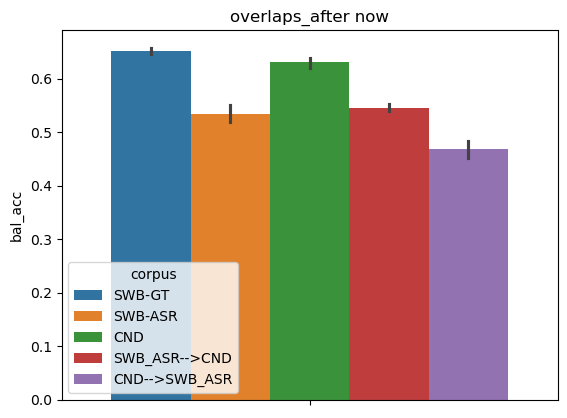

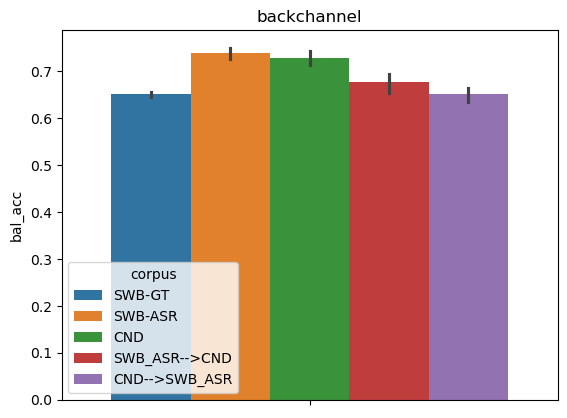

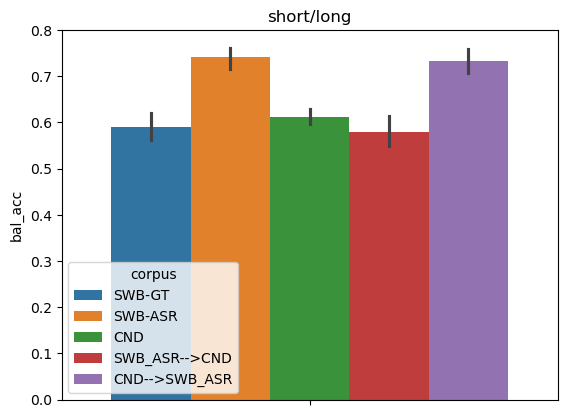

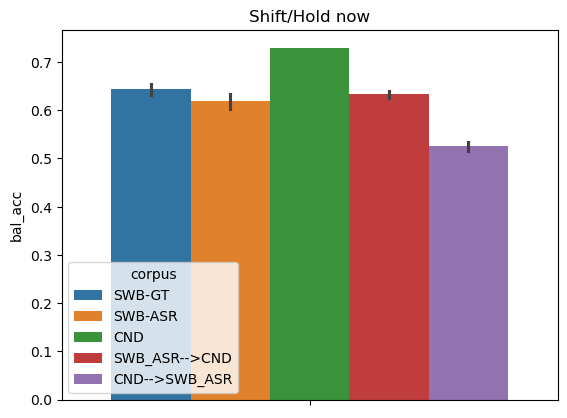

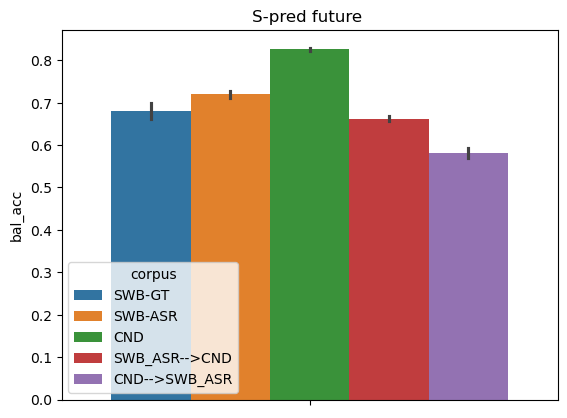

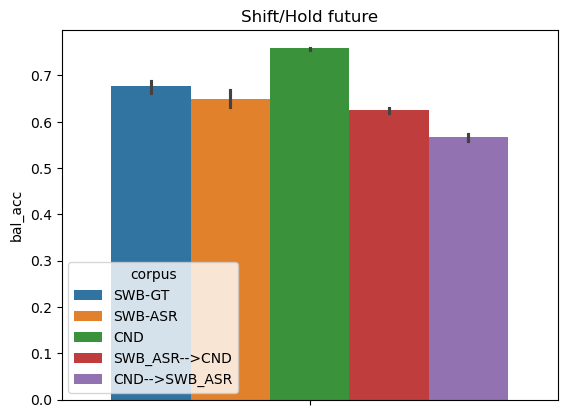

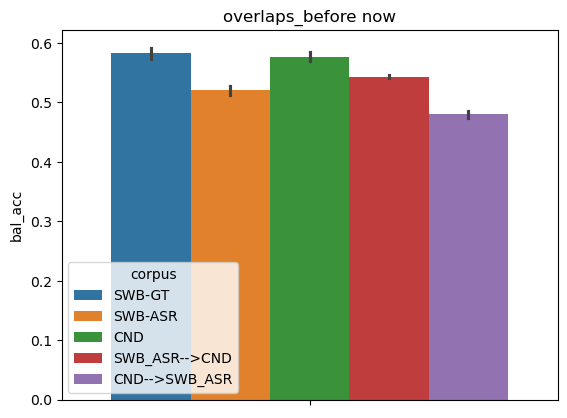

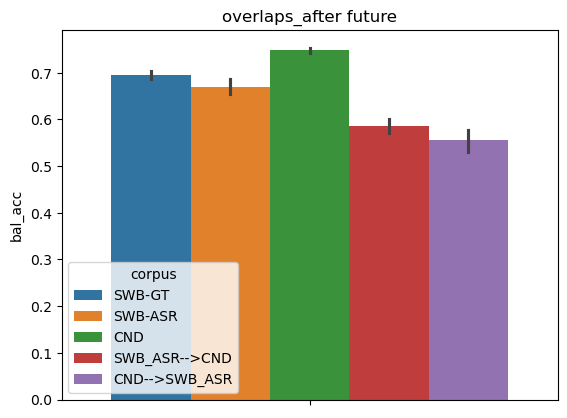

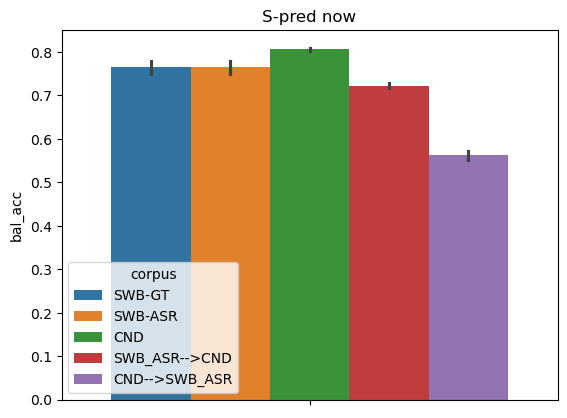

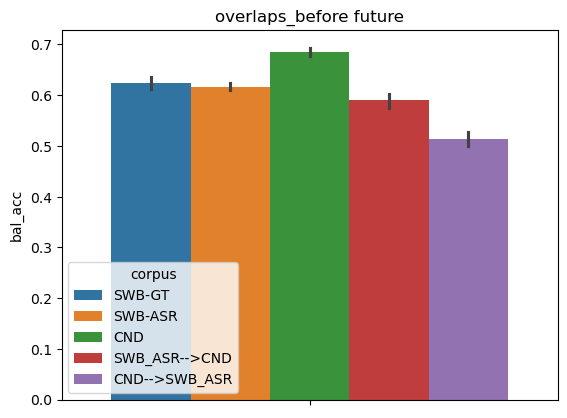

In [8]:
for e in events:
    plt.figure()
    plt.title(e)
    sns.barplot(df[df['Event']==e], y='bal_acc', hue='corpus')
    plt.show()